## Todo:
- figure out potential units
- make function to read coefficients from different snapshots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gala
import gala.potential as gp
import gala.dynamics as gd

import sys
sys.path.append("../../bfe_integrator/src/bfe_tools/")
#from read_coefficients import load_scf_coefficients
import astropy.units as u
from astropy.constants import G
plt.style.use('~/matplotlib.mplstyle')
import agama
import bfe

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [238]:
# 
# path to coeff

v23_L2M10_path = '../../data/expansion/vasiliev23/L2M10/'
v23_L2M11_path = '../../data/expansion/vasiliev23/L2M11/pot_bse/'
v23_L3M10_path = '../../data/expansion/vasiliev23/L3M10/pot_bse/'
v23_L3M11_path = '../../data/expansion/vasiliev23/L3M11/pot_bse/'

v23_L2M10_scf = np.loadtxt(v23_L2M10_path + 'mwhalo010.ini', skiprows=10)

In [3]:
#r = v23_L2M10_scf[:,0]
nmax = 20
lmax = 6
#print(r, nmax, lmax)

In [4]:
## Looping over coefficients
def read_agama_scf(agama_scf, nmax, lmax):
    Snlm = np.zeros((nmax+1, lmax+1, lmax+1))
    Tnlm = np.zeros((nmax+1, lmax+1, lmax+1))
    for n in range(nmax+1):
        for l in range(lmax+1):
            j=1 # j=0 is the value of n order
            for m in range(l):
                Tnlm[n, l, l-m] = agama_scf[n, j]*2**0.5
                j+=1
            for m in range(l+1):
                #if m<0:
                Snlm[n, l, m] = agama_scf[n, j]*(2**0.5 if m>0 else 1)
                j+=1
    return Snlm, Tnlm

In [5]:
def read_agama_scf_time_series(path, snap_name, init_snap, final_snap):
    header = genfromtxt(path + snap_name + "{:03d}.ini".format(init_snap), max_rows=8, dtype='str')
    nmax = int(header[2][5:])
    lmax = int(header[3][5:])
    r0 = int(header[5][3:])
    print('Reading coefficients with nmax={}, lmax={}, and r0={}'.format(nmax, lmax, r0))
    nsnaps = final_snap - init_snap + 1
    Snlmj = np.zeros((nsnaps, nmax+1, lmax+1, lmax+1))
    Tnlmj = np.zeros_like(Snlmj)
    
    for k in range(init_snap, final_snap+1):
        agama_scf = np.loadtxt(path + snap_name + '{:03d}.ini'.format(k), skiprows=10)
        Snlmj[k], Tnlmj[k] = read_agama_scf(agama_scf, nmax, lmax)
    return Snlmj, Tnlmj

In [6]:
Snlm_v23, Tnlm_v23 = read_agama_scf(v23_L2M10_scf, nmax, lmax) 

In [7]:
Snlmj_v23, Tnlmj_v23 = read_agama_scf_time_series(v23_L2M10_path, 'mwhalo', 0, 176)

Reading coefficients with nmax=20, lmax=6, and r0=50


(array([ 72.,  23., 107.,  30.,  64., 512.,  16., 112.,  25.,  68.]),
 array([-3.14154090e+00, -2.51323318e+00, -1.88492547e+00, -1.25661775e+00,
        -6.28310030e-01, -2.31171738e-06,  6.28305407e-01,  1.25661312e+00,
         1.88492084e+00,  2.51322856e+00,  3.14153628e+00]),
 <BarContainer object of 10 artists>)

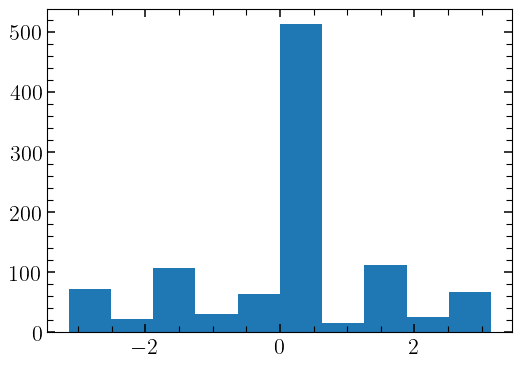

In [190]:
plt.hist(np.arctan2(Snlm_v23, Tnlm_v23).flatten())

In [ ]:
for i in range(177):
    fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharey=True)
    ax[0].set_title(r'$\rm{Time=}$'+'${:.2f}\ $'.format(i/177*11) + r"$\rm{Gyr};$ $m=1$")
    ax[1].set_title(r'$m=2$')
    ax[2].set_title(r'$m=3$')

    im1 = ax[0].imshow(np.arctan2(Snlmj_v23[i], Tnlmj_v23[i])[:,:,1].T, vmin=-3.15, vmax=3.15, cmap='coolwarm', origin='lower')
    ax[1].imshow(np.arctan2(Snlmj_v23[i], Tnlmj_v23[i])[:,:,2].T, vmin=-3.15, vmax=3.15, cmap='coolwarm', origin='lower')
    ax[2].imshow(np.arctan2(Snlmj_v23[i], Tnlmj_v23[i])[:,:,3].T, vmin=-3.15, vmax=3.15, cmap='coolwarm', origin='lower')

    ax[2].set_xlabel('$n$')
    ax[0].set_ylabel('$l$')
    ax[1].set_ylabel('$l$')
    ax[2].set_ylabel('$l$')

    fig.savefig('phase_evolution_VL2M10_m1_{:03d}.png'.format(i))
    cbar = fig.colorbar(im1, orientation='vertical', ax=ax[:3])
    cbar.set_label(r'$\rm{Phase}$')
    #plt.close()

In [243]:
for i in range(177):
    plt.title(r'$\rm{Time=}$'+'${:.2f}\ $'.format(i/177*11) + r"$\rm{Gyr};$ $m=1$, vL3M10")
    plt.imshow(np.arctan2(Snlmj_v23_L3M10[i], Tnlmj_v23_L3M10[i])[:,:,1].T, vmin=-3.15, vmax=3.15, cmap='coolwarm', origin='lower')
    plt.xlabel('$n$', y=20.5)
    plt.ylabel('$l$')
    plt.savefig('phase_evolution_VL3M10_m1_{:03d}.png'.format(i))
    plt.colorbar(orientation='horizontal')
    plt.close()

In [244]:
for i in range(160):
    plt.title(r'$\rm{Time=}$'+'${:.2f}\ $'.format(i/160*11) + r"$\rm{Gyr};$ $m=1$, vL3M11")
    plt.imshow(np.arctan2(Snlmj_v23_L3M11[i], Tnlmj_v23_L3M11[i])[:,:,1].T, vmin=-3.15, vmax=3.15, cmap='coolwarm', origin='lower')
    plt.xlabel('$n$', y=20.5)
    plt.ylabel('$l$')
    plt.savefig('phase_evolution_VL3M11_m1_{:03d}.png'.format(i))
    plt.colorbar(orientation='horizontal')
    plt.close()

In [ ]:
for i in range(160):
    plt.title(r'$\rm{Time=}$'+'${:.2f}\ $'.format(i/160*11) + r"$\rm{Gyr};$ $m=1$, vL2M11")
    plt.imshow(np.arctan2(Snlmj_v23_L2M11[i], Tnlmj_v23_L2M11[i])[:,:,1].T, vmin=-3.15, vmax=3.15, cmap='coolwarm', origin='lower')
    plt.xlabel('$n$', y=20.5)
    plt.ylabel('$l$')
    plt.savefig('phase_evolution_VL2M11_m1_{:03d}.png'.format(i))
    plt.colorbar(orientation='horizontal')
    plt.close()

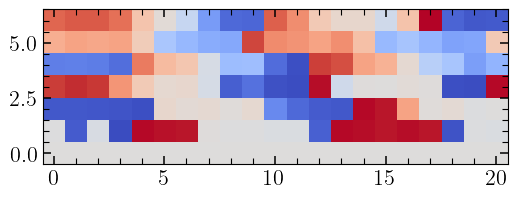

In [199]:
plt.imshow(np.arctan2(Snlmj_v23[60], Tnlmj_v23[60])[:,:,1].T, vmin=-3.15, vmax=3.15, cmap='coolwarm', origin='lower')

In [240]:
Snlmj_v23_L2M11, Tnlmj_v23_L2M11 = read_agama_scf_time_series(v23_L2M11_path, 'mwhalo', 0, 160)
Snlmj_v23_L3M11, Tnlmj_v23_L3M11 = read_agama_scf_time_series(v23_L3M11_path, 'mwhalo', 0, 160)
Snlmj_v23_L3M10, Tnlmj_v23_L3M10 = read_agama_scf_time_series(v23_L3M10_path, 'mwhalo', 0, 176)


Reading coefficients with nmax=20, lmax=6, and r0=50
Reading coefficients with nmax=20, lmax=6, and r0=50
Reading coefficients with nmax=20, lmax=6, and r0=50


In [11]:
np.shape(Snlmj_v23)

(177, 21, 7, 7)

In [48]:
U_v23_t_L2M10 = np.zeros_like(Snlmj_v23)
U_v23_t_L3M10 = np.zeros_like(Snlmj_v23_L3_M10)

for t in range(177):
    v23_coefs = bfe.coefficients.Coeff_properties(Snlmj_v23[t], Tnlmj_v23[t], nmax=nmax+1, lmax=lmax+1)
    U_v23_t_L2M10[t] = v23_coefs.U_all()
    
    v23_coefs = bfe.coefficients.Coeff_properties(Snlmj_v23_L3M10[t], Tnlmj_v23_L3M10[t], nmax=nmax+1, lmax=lmax+1)
    U_v23_t_L2M30[t] = v23_coefs.U_all()

In [242]:
U_v23_t_L2M11 = np.zeros_like(Snlmj_v23_L2M11)
U_v23_t_L3M11 = np.zeros_like(Snlmj_v23_L3M11)

for t in range(160):
    v23_coefs = bfe.coefficients.Coeff_properties(Snlmj_v23_L2M11[t], Tnlmj_v23_L2M11[t], nmax=nmax+1, lmax=lmax+1)
    U_v23_t_L2M11[t] = v23_coefs.U_all()
    
    v23_coefs = bfe.coefficients.Coeff_properties(Snlmj_v23_L3M11[t], Tnlmj_v23_L3M11[t], nmax=nmax+1, lmax=lmax+1)
    U_v23_t_L3M11[t] = v23_coefs.U_all()

Text(0, 0.5, '$l$')

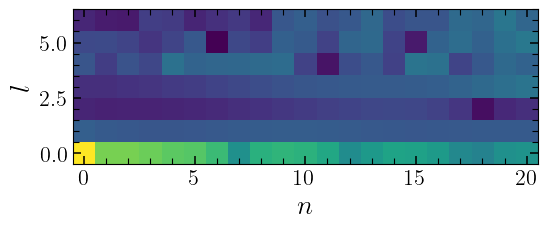

In [49]:
plt.imshow(np.log10(-U_v23_t[0, :,:,0]).T, origin='lower')
plt.xlabel('$n$')
plt.ylabel('$l$')

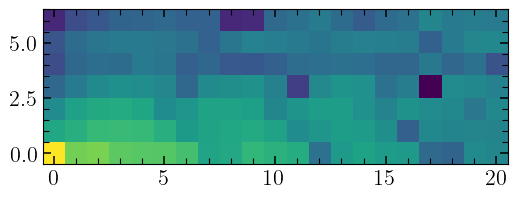

In [50]:
plt.imshow(np.log10(-U_v23_t[100, :,:,0]).T, origin='lower')


In [109]:
## Radial 

In [ ]:
plt.imshow(np.log10(np.sum(U_v23_t[:,:,:,:], axis=2).T, origin='lower'))


/tmp/ipykernel_2838959/3718775484.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(-U_v23_t[0, :,:,1]).T, origin='lower')


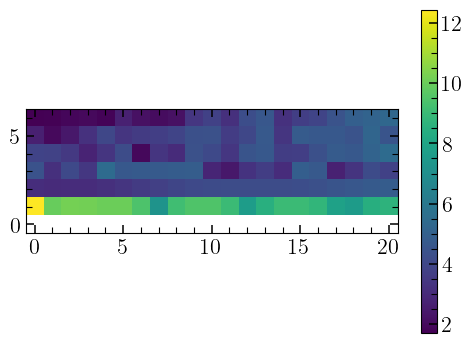

In [87]:
plt.imshow(np.log10(-U_v23_t[0, :,:,1]).T, origin='lower')
plt.colorbar()

In [57]:
np.shape(np.sum(-U_v23_t, axis=1))

(177, 7, 7)

/tmp/ipykernel_2838959/358458860.py:4: RuntimeWarning: divide by zero encountered in log10
  im2 = ax[0][1].imshow(np.log10(np.sum(-U_v23_t[:,:,:,1], axis=1)).T, origin='lower', aspect='auto',
/tmp/ipykernel_2838959/358458860.py:6: RuntimeWarning: divide by zero encountered in log10
  im3 = ax[1][0].imshow(np.log10(np.sum(-U_v23_t[:,:,:,2], axis=1)).T, origin='lower', aspect='auto',
/tmp/ipykernel_2838959/358458860.py:8: RuntimeWarning: divide by zero encountered in log10
  im4 = ax[1][1].imshow(np.log10(np.sum(-U_v23_t[:,:,:,3], axis=1)).T, origin='lower', aspect='auto',


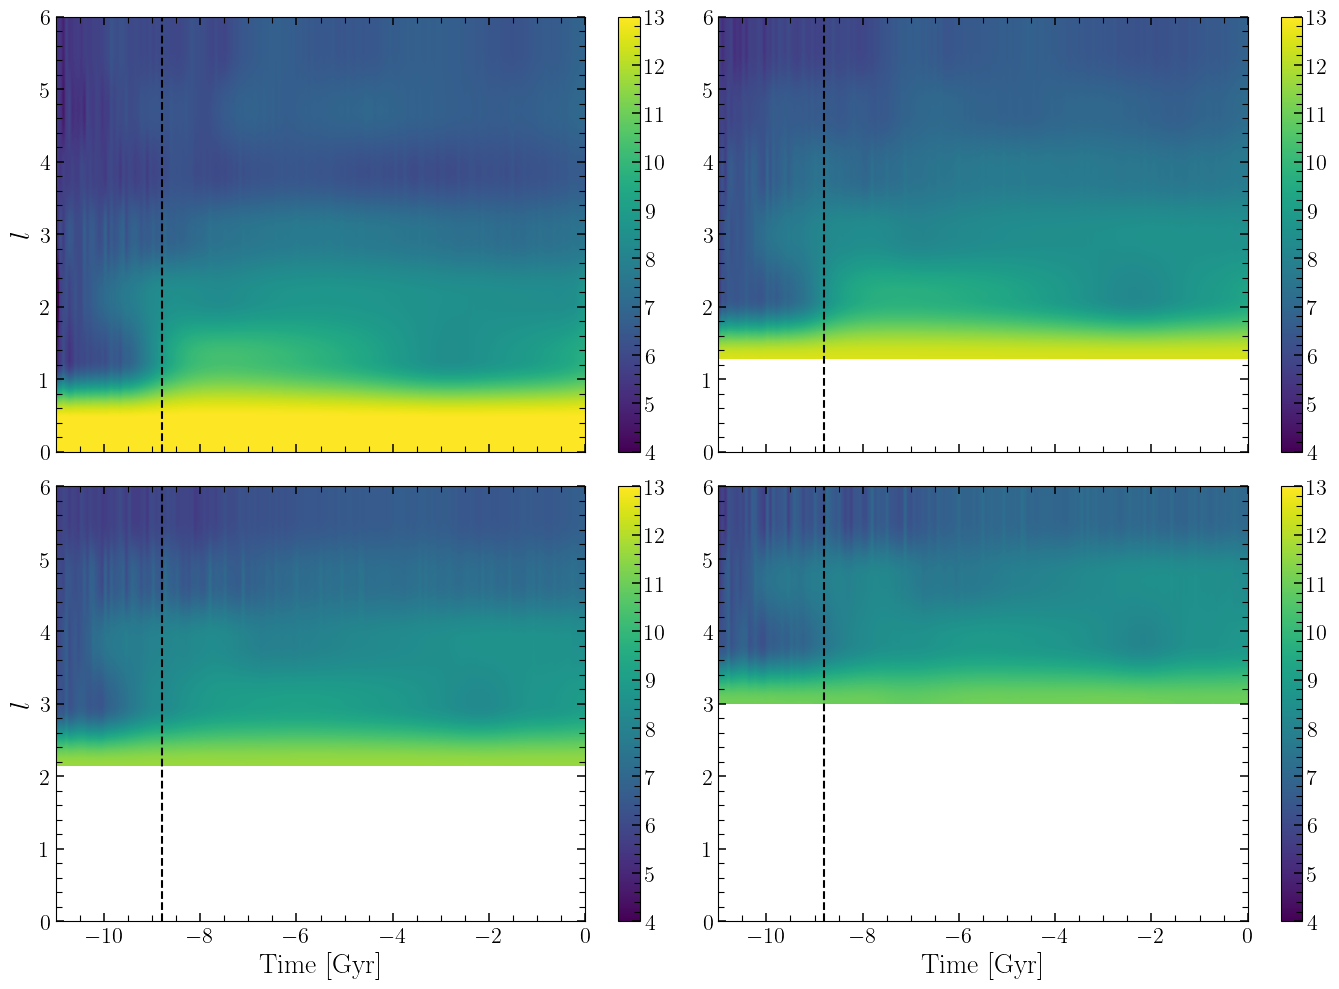

In [108]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
im1 = ax[0][0].imshow(np.log10(np.sum(-U_v23_t[:,:,:,0], axis=1)).T, origin='lower', aspect='auto',
                      extent=[-11, 0, 0, 6], vmin=4, vmax=13)
im2 = ax[0][1].imshow(np.log10(np.sum(-U_v23_t[:,:,:,1], axis=1)).T, origin='lower', aspect='auto', 
                      extent=[-11, 0, 0, 6], vmin=4, vmax=13)
im3 = ax[1][0].imshow(np.log10(np.sum(-U_v23_t[:,:,:,2], axis=1)).T, origin='lower', aspect='auto', 
                      extent=[-11, 0, 0, 6], vmin=4, vmax=13)
im4 = ax[1][1].imshow(np.log10(np.sum(-U_v23_t[:,:,:,3], axis=1)).T, origin='lower', aspect='auto', 
                      extent=[-11, 0, 0, 6], vmin=4, vmax=13)

ax[1][0].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[1][1].set_xlabel(r'$\rm{Time\ [Gyr]}$')

ax[0][0].set_ylabel('$l$')
ax[1][0].set_ylabel('$l$')

fig.colorbar(im1, ax=ax[0][0])
fig.colorbar(im2, ax=ax[0][1])
fig.colorbar(im3, ax=ax[1][0])
fig.colorbar(im4, ax=ax[1][1])

ax[0][0].set_ylim(0, 6)
ax[0][1].set_ylim(0, 6)
ax[1][0].set_ylim(0, 6)
ax[1][1].set_ylim(0, 6)

ax[0][0].axvline(-8.8, c='k', ls='--')
ax[0][1].axvline(-8.8, c='k', ls='--')
ax[1][0].axvline(-8.8, c='k', ls='--')
ax[1][1].axvline(-8.8, c='k', ls='--')

fig.tight_layout()

In [110]:
def power_matrices(power):
    assert len(np.shape(power)) == 4, 'Power should be a matrix of shape (time, n, l, m)'

    tmax = np.shape(power)[0]
    nmax = np.shape(power)[1]
    lmax = np.shape(power)[2]
    mmax = np.shape(power)[3]
    
    print("Computing power for, tmax={}, nmax={}, lmax={}, mmax={}".format(tmax, nmax, lmax, mmax))
    # Compute power summing over l and m
    power_n = np.sum(np.sum(power, axis=2), axis=2)
    # Compute power summing over n, and m
    #print(np.shape(test_power))
    power_l = np.zeros((tmax, lmax))
    power_lm = np.sum(power, axis=1)

    for l in range(lmax):
        power_l[:,l] = np.sum(power_lm[:,l,:l+1], axis=1)
        
    return power_n, power_l

## Radial 

In [111]:
U_v23_n, U_v23_m = power_matrices(U_v23_t)

Computing power for, tmax=177, nmax=21, lmax=7, mmax=7


In [116]:
np.shape(U_v23_n)

(177, 21)

In [127]:
177/11

16.09090909090909

In [135]:
np.shape(np.mean(U_v23_n, axis=0))

(21,)

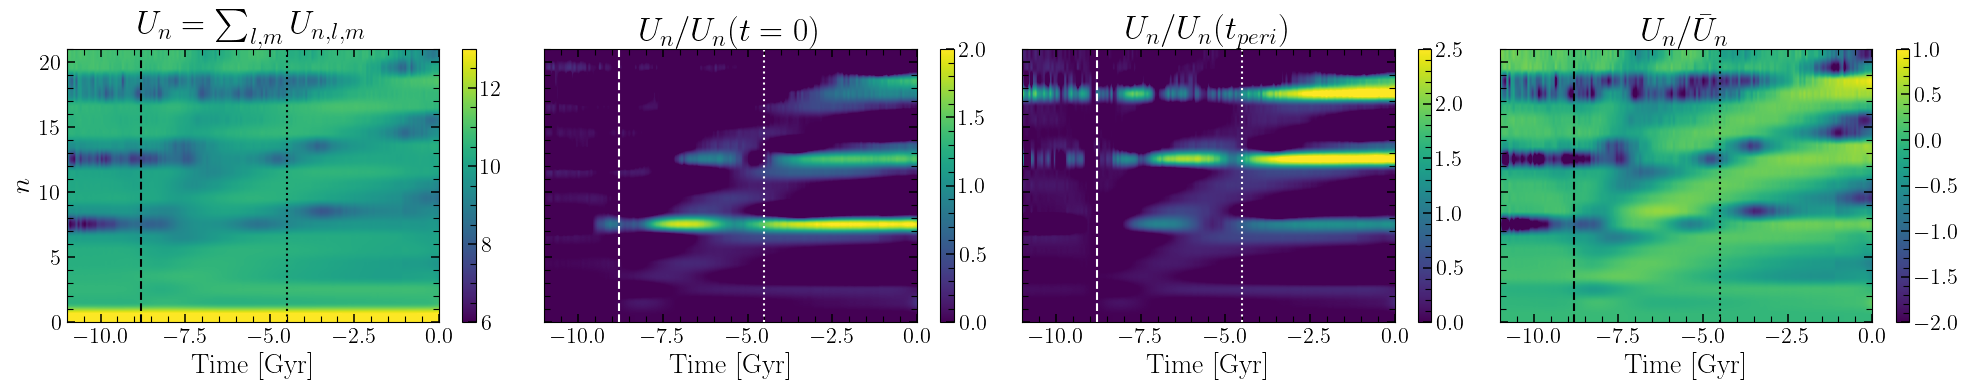

In [172]:
fig, ax = plt.subplots(1,4, figsize=(20, 4), sharey=True)
im1 = ax[0].imshow(np.log10(-U_v23_n).T, origin='lower', aspect='auto',
                      extent=[-11, 0, 0, 21], vmin=6, vmax=13)

im2 = ax[1].imshow(np.log10(U_v23_n /U_v23_n[0]).T, origin='lower', aspect='auto',
                      extent=[-11, 0, 0, 21], vmin=0, vmax=2)


im3 = ax[2].imshow(np.log10(U_v23_n /U_v23_n[33]).T, origin='lower', aspect='auto',
                      extent=[-11, 0, 0, 21], vmin=0, vmax=2.5)

im4 = ax[3].imshow(np.log10(U_v23_n /np.mean(U_v23_n, axis=0)).T, origin='lower', aspect='auto',
                      extent=[-11, 0, 0, 21], vmin=-2, vmax=1)

ax[0].axvline(-8.8, c='k', ls='--')
ax[1].axvline(-8.8, c='w', ls='--')
ax[2].axvline(-8.8, c='w', ls='--')
ax[3].axvline(-8.8, c='k', ls='--')

ax[0].axvline(-4.5, c='k', ls=':')
ax[1].axvline(-4.5, c='w', ls=':')
ax[2].axvline(-4.5, c='w', ls=':')
ax[3].axvline(-4.5, c='k', ls=':')



ax[0].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[1].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[2].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[3].set_xlabel(r'$\rm{Time\ [Gyr]}$')

ax[0].set_ylabel(r'$n$')

fig.colorbar(im1, ax=ax[0])
fig.colorbar(im2, ax=ax[1])
fig.colorbar(im3, ax=ax[2])
fig.colorbar(im4, ax=ax[3])

ax[0].set_title(r'$U_{n} = \sum_{l,m} U_{n,l,m}$')
ax[1].set_title(r'$U_{n} / U_{n}(t=0)$')
ax[2].set_title(r'$U_{n} / U_{n}(t_{peri})$')
ax[3].set_title(r'$U_{n} / \bar{U}_{n}$')


fig.tight_layout()


## first peri is show with the dashed line
## Second peri is present time.
## Apo is dotted line
## Would be good to plot the basis functions to see at what radii the main changes are happening


In [ ]:
plt.imshow(np.log10(-U_v23_n).T, origin='lower', aspect='auto',
                      extent=[-11, 0, 0, 21], vmin=6, vmax=13)
plt.xlabel(r'$\rm{Time\ [Gyr]}$')
plt.colorbar()

In [80]:
nn, ll = power_matrices(np.sqrt(Snlmj_v23**2 + Tnlmj_v23**2))

Computing power for, tmax=177, nmax=21, lmax=7, mmax=7


In [98]:
power_v23_L2M10 = np.sqrt(Snlmj_v23**2 + Tnlmj_v23**2)

In [123]:
tcoeff = np.linspace(-11, 0, 177)

In [141]:
tcoeff[35]

-8.8125

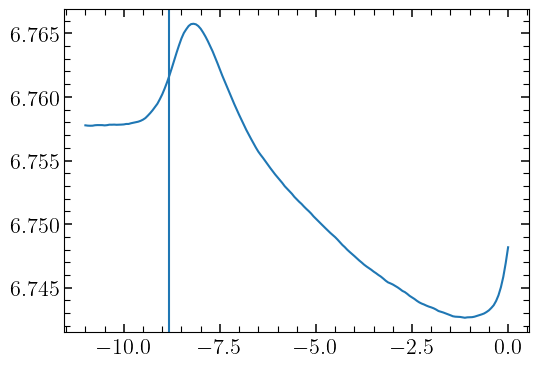

In [142]:
plt.plot(tcoeff, np.log10(power_v23_L2M10[:,0,0,0]))
plt.axvline(tcoeff[35])


In [ ]:
bfe.coefficients.

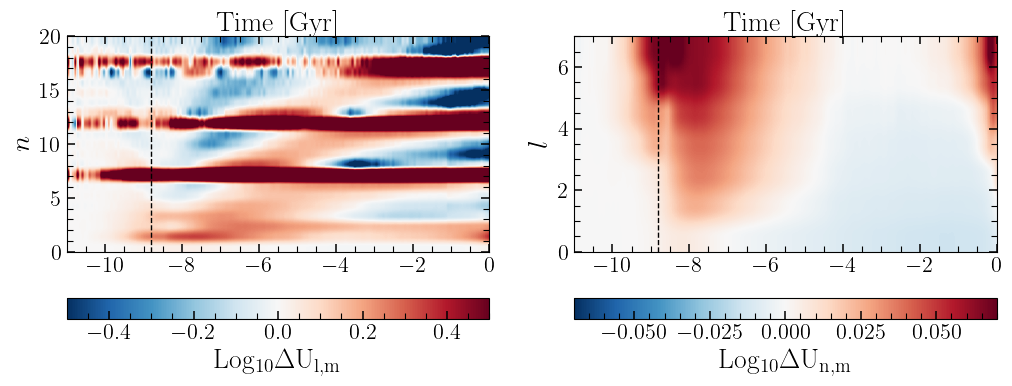

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))


im = ax[0].imshow(np.log10(nn/nn[1,:]).T, aspect='auto', origin='lower', cmap='RdBu_r', extent=[-11, 0, 0, 20], vmin=-0.5, vmax=0.5)
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label(r'$\rm{Log_{10}} \Delta U_{l,m}$')

ax[0].xaxis.set_label_position('top')
ax[0].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[0].set_ylabel('$n$')
ax[0].axvline(tcoeff[35], c='k', ls='--', lw=1)

im = ax[1].imshow(np.log10(ll/ll[0,:]).T, aspect='auto', origin='lower', cmap='RdBu_r', extent=[-11, 0, 0, 7], vmin=-0.07, vmax=0.07)
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label(r'$\rm{Log_{10}} \Delta U_{n,m}$')
ax[1].xaxis.set_label_position('top')
ax[1].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[1].set_ylabel('$l$')
ax[1].axvline(tcoeff[35], c='k', ls='--', lw=1)


plt.savefig('../../figures/power_scf_v23_L2M10.png', bbox_inches='tight')
plt.savefig('../../figures/power_scf_v23_L2M10.pdf', bbox_inches='tight')

In [38]:
# AGAMA's  coefficients path 

In [165]:
lmc_traj = np.loadtxt('../../data/expansion/vasiliev23/L2M10/trajlmc.txt')#

In [166]:
#mw_traj = np.loadtxt('../../data/expansion/vasiliev23/L2M10/trajlmc.txt')

In [167]:
np.shape(lmc_traj)

(1409, 7)

In [168]:
pos = np.sqrt(np.sum(lmc_traj[:,1:4]**2, axis=1))
t = lmc_traj[:,0]

In [171]:
t[0]

-11.0

In [120]:
1409/8

176.125

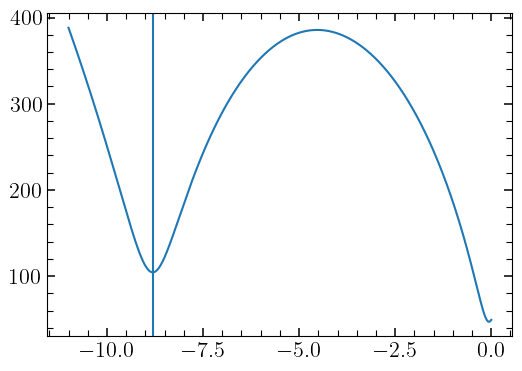

In [133]:
plt.plot(t, pos)
plt.axvline(-8.8)

In [41]:
#lmc_pot = agama.Potential('../../data/expansion/vasiliev23/L2M10/lmc029.ini')
mw_pot = agama.Potential('../../data/expansion/vasiliev23/L2M10/mwhalo010.ini')

In [64]:
mw_pot.potential([100, 100, 0])

-29569.286300975462

In [82]:
agala = agama.GalaPotential(mw_pot, units=[u.kpc, u.Gyr, 232500*u.Msun, u.radian])

In [83]:
agala.energy([100, 100, 0])

<Quantity [-29569.28630098] kpc2 / Gyr2>

In [67]:
galaSCF = gp.SCFPotential(m=1, r_s=50., Snlm = v23_L2M10_Snlm, Tnlm=v23_L2M10_Tnlm, units=[u.kpc, u.Gyr, 232500*u.Msun, u.radian])

In [72]:
galaSCF.energy([100, 100, 0])#.to(u.km**2/u.s**2)

<Quantity [-25552.0598263] kpc2 / Gyr2>

In [46]:
G.to(u.kpc * u.km**2 / u.s**2 / u.Msun)

<Quantity 4.30091727e-06 km2 kpc / (s2 solMass)>

In [48]:
(galaSCF.energy([100, 100, 0]))/G.to(u.kpc * u.km**2 / u.s**2 / u.Msun)

<Quantity [-1.0990537e+11] kpc s2 solMass / (Gyr2 km2)>

In [13]:
almc = lmc_pot.force(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T)

NameError: name 'y_grid' is not defined

In [14]:
amw = mw_pot.force(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T)

NameError: name 'y_grid' is not defined

In [79]:
np.shape(almc)

(90000, 3)